In [82]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('Pokemon.csv', encoding='MacRoman')
data

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,FALSE
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,FALSE
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,FALSE
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,FALSE
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,FALSE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,TRUE
806,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined
807,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined
808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,


In [83]:
# 删除末尾4行（无意义）
data = data.iloc[:-4]

data

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,FALSE
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,FALSE
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,FALSE
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,FALSE
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,FALSE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,TRUE
802,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,TRUE
803,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,TRUE
804,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,TRUE


In [84]:
# 重复数据
duplicates = data[data.duplicated()]
duplicates

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
15,11,Metapod,Bug,NaN,205,50,20,55,25,25,30,1,FALSE
23,17,Pidgeotto,Normal,Flying,349,63,60,55,50,50,71,1,FALSE
185,168,Ariados,Bug,Poison,390,70,90,70,60,60,40,2,FALSE
186,168,Ariados,Bug,Poison,390,70,90,70,60,60,40,2,FALSE
187,168,Ariados,Bug,Poison,390,70,90,70,60,60,40,2,FALSE


In [85]:
#删除重复数据
data = data.drop_duplicates()
data

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,FALSE
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,FALSE
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,FALSE
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,FALSE
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,FALSE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,TRUE
802,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,TRUE
803,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,TRUE
804,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,TRUE


In [86]:
print(data.isnull().sum())

#               1
Name            1
Type 1          2
Type 2        383
Total           1
HP              2
Attack          1
Defense         1
Sp. Atk         1
Sp. Def         1
Speed           1
Generation      1
Legendary       3
dtype: int64


In [87]:
data["Type 2"] = data["Type 2"].fillna("None")
data = data.dropna(how="any")
data.reset_index(drop=True, inplace=True)
data

C:\Users\asus\AppData\Local\Temp\ipykernel_4456\1684559342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Type 2"] = data["Type 2"].fillna("None")


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,FALSE
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,FALSE
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,FALSE
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,FALSE
4,4,Charmander,Fire,None,309,39,52,43,60,50,65,1,FALSE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,TRUE
793,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,TRUE
794,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,TRUE
795,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,TRUE


In [88]:
# 定义需要转换的字段
numeric_cols = ["Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", "Generation"]

# 清理字段中的非数值内容（根据检测结果调整）
for col in numeric_cols:
    if data[col].dtype == "object":
        # 去除特殊符号（如+、?、,）
        data[col] = data[col].str.replace(r"[^\d.]", "", regex=True)
        # 将空字符串或无法清理的值转换为NaN
        data[col] = data[col].replace("", pd.NA)
        
for col in numeric_cols:
    # errors="coerce"：无法转换的值设为NaN
    data[col] = pd.to_numeric(data[col], errors="coerce")
    # 若字段应为整数（无小数），转换为int64（先填充缺失值，否则无法转为int）
    data[col] = data[col].fillna(data[col].mean()).astype(int)  # 用均值填充缺失值

C:\Users\asus\AppData\Local\Temp\ipykernel_4456\112074994.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].str.replace(r"[^\d.]", "", regex=True)
C:\Users\asus\AppData\Local\Temp\ipykernel_4456\112074994.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].replace("", pd.NA)
C:\Users\asus\AppData\Local\Temp\ipykernel_4456\112074994.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

<Axes: xlabel='Type 2'>

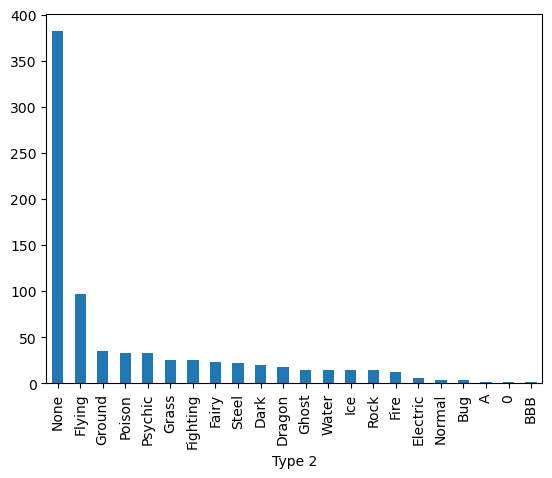

In [ ]:
# 统计 "Type 2" 列的频率分布
data["Type 2"].value_counts().plot(kind='bar')

In [90]:
# 去除 "Type 2" 列中值为 "A"、"BBB" 和 "0" 的行
data = data[~data["Type 2"].isin(["A", "BBB", "0"])]


([<matplotlib.axis.YTick at 0x1a4e4aaec50>,
 [Text(0, 0, '0'),
  Text(0, 100, '100'),
  Text(0, 200, '200'),
  Text(0, 300, '300'),
  Text(0, 400, '400'),
  Text(0, 500, '500')])

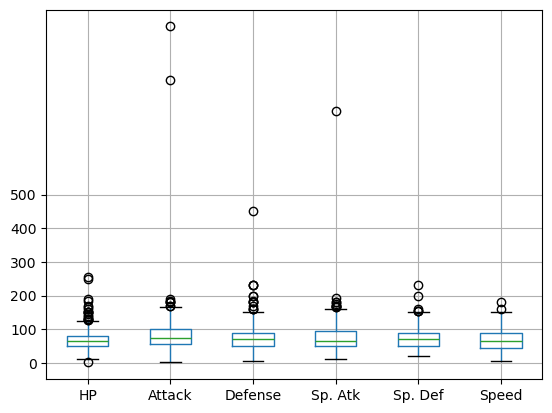

In [91]:
#查看数值是否有异常值
data.boxplot(column=["HP","Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"])
plt.yticks([0,100,200,300,400,500])

In [92]:
#去除异常值
data = data[(data["Attack"] <= 400) & (data["Attack"] >= 100) & (data["Defense"] <= 400) & (data["Sp. Atk"] <= 400)]

<Axes: xlabel='Generation'>

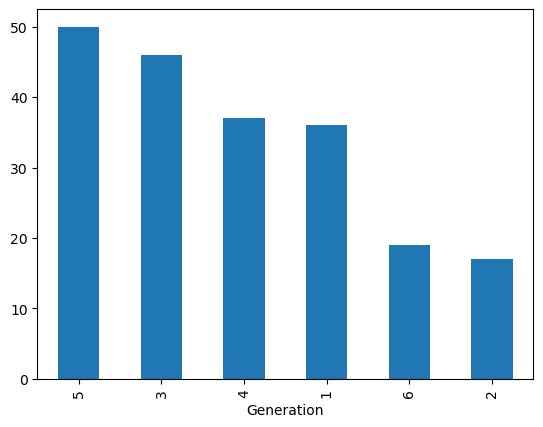

In [93]:
data["Generation"].value_counts().plot(kind='bar')

<Axes: xlabel='Legendary'>

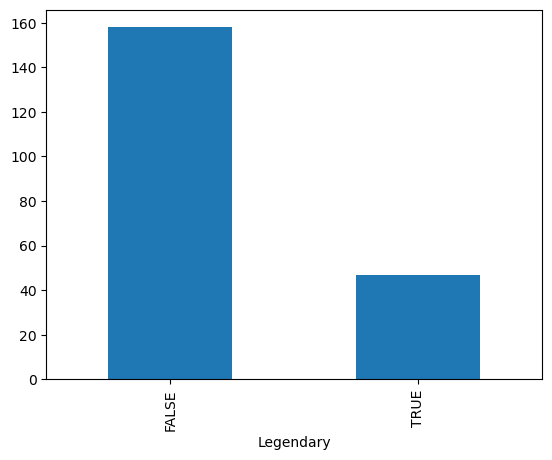

In [94]:
data["Legendary"].value_counts().plot(kind='bar')

In [95]:
# 计算各单项能力值之和
data["Calculated_Total"] = data["HP"] + data["Attack"] + data["Defense"] + data["Sp. Atk"] + data["Sp. Def"] + data["Speed"]

# 查看Total与Calculated_Total不一致的记录
inconsistent_rows = data[~data["Total"].round(0).eq(data["Calculated_Total"].round(0))]

if len(inconsistent_rows) > 0:
    print("\n不一致记录示例：")
    print(inconsistent_rows[["Name", "Total", "Calculated_Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]])

# 用计算出的总能力值修正Total字段，确保数据一致性
data.loc[:, "Total"] = data["Calculated_Total"]

# 删除临时计算字段
data.drop("Calculated_Total", axis=1, inplace=True)

print("\n数据一致性校验与修正完成，Total字段已与各单项能力值之和保持一致。")


不一致记录示例：
                    Name  Total  Calculated_Total   HP  Attack  Defense  \
784  GourgeistSuper Size    494               594  185     100      122   
786              Avalugg    714               514   95     117      184   

     Sp. Atk  Sp. Def  Speed  
784       58       75     54  
786       44       46     28  

数据一致性校验与修正完成，Total字段已与各单项能力值之和保持一致。


In [96]:
#保存处理好的数据
data.to_csv('Pokemon_cleaned.csv', index=False)